## Завдання ЛР 4

У цій роботі ви спробуєте навчити класифікатор класифікувати позичальників банку на добросовісних (ті, що вчасно повернуть кредит) та недобросовісних (ті, що не повернуть кредит або повернуть невчасно) на основі набору характеристик позичальників банку.

In [1]:
#імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('credit_default.csv')
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
df.describe ()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
#Датафрейм df містить 32,581 запис про клієнтів і 12 стовпців. Це дані про персональні характеристики клієнтів, їх фінансовий стан,
#а також деякі параметри взятих ними кредитів.

### Опис датафрейму  
Цей набір даних містить інформацію про 32581 позичальників банку:  
**person_age** - вік позичальника  
**person_income** - річний дохід позичальника     
**person_home_ownership** - житло: орендує, виплачує іпотеку, власне житло     
**person_emp_length** - стаж роботи      
**loan_intent** - призначення кредиту: навчання, лікування і т.д.  
**loan_grade** - кредитний рейтинг       
**loan_amnt** - розмір кредиту     
**loanintrate** - відсоткова ставка по кредиту  
**loan_status - статус кредиту (0 сплачено, 1 - не сплачено) ЦІЛЬОВА ЗМІННА**     
**loan_percent_income** - розмір кредитного платежу у % до доходу   
**cb_person_default_on_file** - кредитна історія   
**cb_preson_cred_hist_length** - тривалість кредитної історії

### Завдання
1. Подивіться на датасет: .head (), .info (), .dtypes, .describe ()  
2. Для кращого розуміння даних порівняйте характеристики добросовісних та недобросовісних позичальників, **зробіть відповідні висновки**  
3. Виконайте попередню обробку даних  
4. Реалізуйте алгоритми логістичної регресії, найближчих сусідів (KNN) та опорних векторів (SVM) для класифікації позичальників банку (<span style="color:red"> перший алгоритм розглядала на лекції, другий, третій - на самостійне опрацювання</span>). Перевірте точність класифікаторів та обретіть найкращий із них для подальшої роботи. **Зробіть висновки: чи вдалося побудувати точний класифікатор; який із трьох розглянутих алгоритмів показав найкращі, а який найгірші результати?**  
5. Необхідно прийняти рішення щодо видачі кредиту  для нових позичальників, інформація про яких знаходиться в файлі 'give_refuse_a_loan.csv': спрогнозуйте значення цільової змінної та **зробіть висновки яким позичальникам варто видати кредит, а яким - відмовити.**

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
#(int64):
#person_age 
#person_income
#loan_amnt
#loan_status
#cb_person_cred_hist_length
#(float64):
#person_emp_length
#loan_int_rate
#loan_percent_income
#(object):
#person_home_ownership
#loan_intent
#loan_grade
#cb_person_default_on_file
#person_emp_length — 895 пропущених значень.
#loan_int_rate — 3116 пропущених значень.

In [7]:
#2 Для кращого розуміння даних порівняйте характеристики добросовісних та недобросовісних позичальників, зробіть відповідні висновки
#(object):
#person_home_ownership: Оренда пов’язана з вищим ризиком, власне житло або іпотека — з більшою стабільністю.

#loan_intent: Кредити на навчання частіше виплачуються, а на особисті потреби, медицину та бізнес-проекти — більш ризиковані.

#loan_grade: Вищий рейтинг (A, B) асоціюється з добросовісністю; середній і низький (C, D) — з вищим ризиком.

#cb_person_default_on_file: Позичальники з попередніми боргами (Y) частіше не виплачують кредити.

In [8]:
# Поділ на групи за статусом кредиту
good_borrowers = df[df['loan_status'] == 0]
bad_borrowers = df[df['loan_status'] == 1]

# Розрахунок середніх значень для кожної характеристики
good_avg = good_borrowers.mean(numeric_only=True)
bad_avg = bad_borrowers.mean(numeric_only=True)

In [9]:
# Порівняння результатів
comparison = pd.DataFrame({'Good Borrowers': good_avg, 'Bad Borrowers': bad_avg})

# Вивід результатів
print(comparison)

                            Good Borrowers  Bad Borrowers
person_age                       27.807129      27.474676
person_income                 70804.361559   49125.652223
person_emp_length                 4.968745       4.137562
loan_amnt                      9237.464178   10850.502954
loan_int_rate                    10.435999      13.060207
loan_status                       0.000000       1.000000
loan_percent_income               0.148805       0.246889
cb_person_cred_hist_length        5.837475       5.685003


In [10]:
#(person_age): Добросовісні позичальники дещо старші, але різниця незначна.

#(person_income): Добросовісні позичальники мають значно вищий дохід.

#(person_emp_length): Добросовісні позичальники мають більший стаж роботи.

#(loan_amnt): Недобросовісні позичальники, в середньому, беруть більші кредити.

#(loan_int_rate): Недобросовісні позичальники отримують кредити під вищу відсоткову ставку.

#(loan_percent_income): Недобросовісні позичальники витрачають більше відсотків свого доходу на погашення кредиту.

#(cb_person_cred_hist_length): Добросовісні позичальники мають трохи довшу кредитну історію, але різниця невелика.

In [11]:
#3 Виконайте попередню обробку даних

In [12]:
#Видалимо інші рядки ,де є пропуски.
df.dropna(inplace=True)

In [13]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [14]:
# Список стовпців, для яких потрібно видалити викиди
columns_to_clean = [
    'person_age', 
    'person_income', 
    'person_emp_length', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length'
]

# Початковий DataFrame
df = df.copy()  # Зробіть копію, якщо потрібно зберегти початкові дані

# Очищення даних для кожного стовпця
for column in columns_to_clean:
    # Обчислюємо квантилі 1% та 99%
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    
    # Фільтруємо дані з урахуванням пропусків (NaN)
    df_cleaned = df[((df[column] >= lower_bound) & (df[column] <= upper_bound)) | (df[column].isna())]
    
    # Перевіряємо розмір нового DataFrame після видалення викидів
    print(f'Кількість рядків після видалення викидів для стовпця {column}: {df_cleaned.shape[0]}')
    
    # Повертаємося до оновленого DataFrame
    df = df_cleaned.copy()  # Зберігаємо очищений DataFrame

# Огляд фінального очищеного DataFrame
df.info()

Кількість рядків після видалення викидів для стовпця person_age: 28371
Кількість рядків після видалення викидів для стовпця person_income: 27871
Кількість рядків після видалення викидів для стовпця person_emp_length: 27610
Кількість рядків після видалення викидів для стовпця loan_amnt: 27108
Кількість рядків після видалення викидів для стовпця loan_int_rate: 26847
Кількість рядків після видалення викидів для стовпця loan_percent_income: 26318
Кількість рядків після видалення викидів для стовпця cb_person_cred_hist_length: 26318
<class 'pandas.core.frame.DataFrame'>
Index: 26318 entries, 63 to 32295
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26318 non-null  int64  
 1   person_income               26318 non-null  int64  
 2   person_home_ownership       26318 non-null  object 
 3   person_emp_length           26318 non-null  float64
 4   loan_intent   

In [15]:
#Визначимо матрицю незалежних змінних (факторів) та вектор залежної (цільової) змінної
X = df.drop(df[['loan_status']], axis=1)
print(X.head())
y = df['loan_status']
print(y.head())

    person_age  person_income person_home_ownership  person_emp_length  \
63          25         221850              MORTGAGE                9.0   
73          23          65000                  RENT                2.0   
74          26          85000                  RENT                2.0   
76          22          88000                  RENT                6.0   
79          24          83004                  RENT                0.0   

   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
63     MEDICAL          D      25000          15.70                 0.10   
73   EDUCATION          A      28000           7.90                 0.43   
74     VENTURE          A      28000           7.49                 0.33   
76     VENTURE          B      28000           9.91                 0.32   
79     VENTURE          D      28000          15.99                 0.34   

   cb_person_default_on_file  cb_person_cred_hist_length  
63                         N           

In [16]:
# Вибираємо категоріальні стовпці в матриці незалежних змінних
categorical_columns = X.select_dtypes(include=['object']).columns

# Вибираємо кількісні ознаки (числові стовпці) в матриці незалежних змінних
numeric_columns = X.select_dtypes(include=[float, int]).columns


In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Імпортуємо клас OneHotEncoder з бібліотеки sklearn
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Застосовуємо OneHotEncoder до категоріальних стовпців
encoded_columns = encoder.fit_transform(X[categorical_columns])

# Створюємо новий DataFrame з перекодованими змінними і назвами колонок
encoded_X = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns), index=X.index)

# Об'єднуємо початковий DataFrame з новими перекодованими стовпцями
X = X.drop(columns=categorical_columns)  # Видаляємо оригінальні категоріальні стовпці
X = pd.concat([X, encoded_X], axis=1)

# Перевіряємо результати
print(X.head())

    person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
63          25         221850                9.0      25000          15.70   
73          23          65000                2.0      28000           7.90   
74          26          85000                2.0      28000           7.49   
76          22          88000                6.0      28000           9.91   
79          24          83004                0.0      28000          15.99   

    loan_percent_income  cb_person_cred_hist_length  \
63                 0.10                           2   
73                 0.43                           2   
74                 0.33                           3   
76                 0.32                           3   
79                 0.34                           4   

    person_home_ownership_OTHER  person_home_ownership_OWN  \
63                          0.0                        0.0   
73                          0.0                        0.0   
74            

In [18]:
X.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 26318 entries, 63 to 32295
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   26318 non-null  int64  
 1   person_income                26318 non-null  int64  
 2   person_emp_length            26318 non-null  float64
 3   loan_amnt                    26318 non-null  int64  
 4   loan_int_rate                26318 non-null  float64
 5   loan_percent_income          26318 non-null  float64
 6   cb_person_cred_hist_length   26318 non-null  int64  
 7   person_home_ownership_OTHER  26318 non-null  float64
 8   person_home_ownership_OWN    26318 non-null  float64
 9   person_home_ownership_RENT   26318 non-null  float64
 10  loan_intent_EDUCATION        26318 non-null  float64
 11  loan_intent_HOMEIMPROVEMENT  26318 non-null  float64
 12  loan_intent_MEDICAL          26318 non-null  float64
 13  loan_intent_PERSONAL

In [19]:
#Стандартизуємо матрицю Х
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [20]:
#4 Реалізуйте алгоритми логістичної регресії, найближчих сусідів (KNN) та опорних векторів (SVM) для класифікації позичальників банку 
#( перший алгоритм розглядала на лекції, другий, третій - на самостійне опрацювання).
#Перевірте точність класифікаторів та обретіть найкращий із них для подальшої роботи.
#Зробіть висновки: чи вдалося побудувати точний класифікатор; який із трьох розглянутих алгоритмів показав найкращі, а який найгірші результати?

In [21]:

# імпортуємо train_test_split із модуля sklearn.model_selection
from sklearn.model_selection import train_test_split

#Розділимо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_std, y, stratify = y, test_size=0.2, random_state=0)

Logistic Regression - Точність на навчальній вибірці: 0.869
Logistic Regression - Точність на тестовій вибірці: 0.876


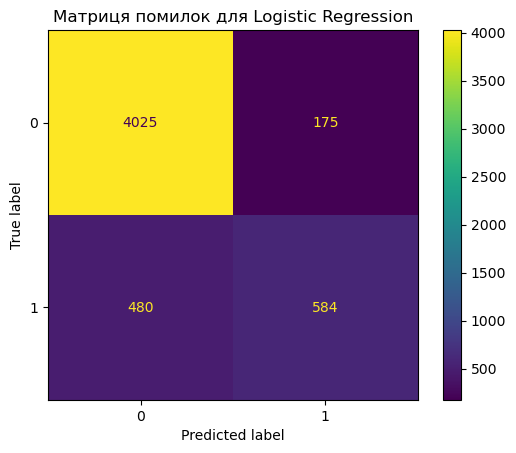

KNN - Точність на навчальній вибірці: 0.919
KNN - Точність на тестовій вибірці: 0.901


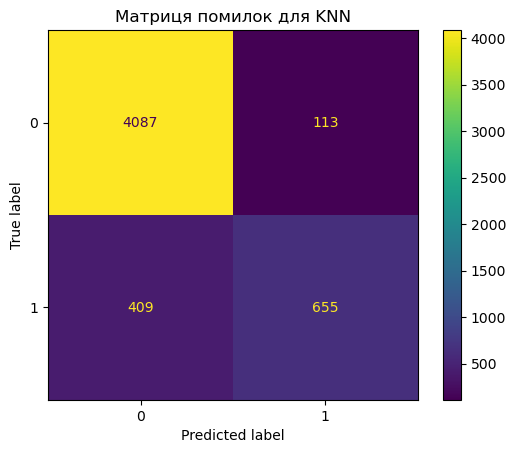

SVM - Точність на навчальній вибірці: 0.917
SVM - Точність на тестовій вибірці: 0.918


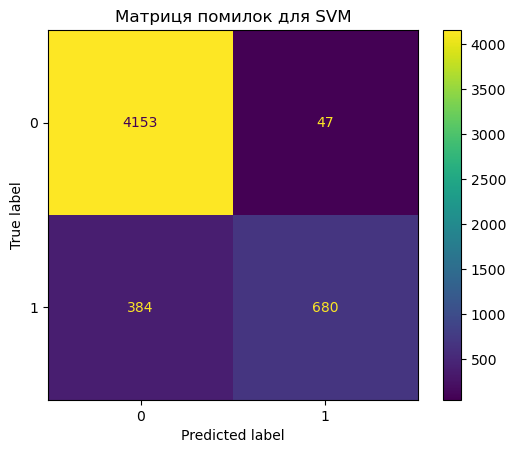

Найкращий класифікатор для подальшої роботи: SVM з точністю на тестовій вибірці 0.918


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Створюємо список моделей з їх назвами
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("SVM", SVC())
]

# Словник для зберігання результатів точності
accuracy_results = {}

# Цикл для тренування, оцінки та виведення результатів для кожної моделі
for model_name, model in models:
    # Навчання моделі
    model.fit(X_train, y_train)
    
    # Прогнози на навчальній та тестовій вибірках
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Обчислення точності
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_results[model_name] = accuracy_test  # Зберігаємо точність на тестовій вибірці
    
    # Виведення результатів
    print(f"{model_name} - Точність на навчальній вибірці: {accuracy_train:.3f}")
    print(f"{model_name} - Точність на тестовій вибірці: {accuracy_test:.3f}")
    
    # Побудова матриці помилок на тестовій вибірці
    cm = confusion_matrix(y_test, y_pred_test)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
    cmd.plot()
    plt.title(f"Матриця помилок для {model_name}")
    plt.show()

# Вибір найкращої моделі за точністю на тестовій вибірці
best_model_name = max(accuracy_results, key=accuracy_results.get)
print(f"Найкращий класифікатор для подальшої роботи: {best_model_name} з точністю на тестовій вибірці {accuracy_results[best_model_name]:.3f}")


In [ ]:
# Тепер навчання SVM
svm = SVC()  
svm.fit(X_train, y_train)  # Навчаємо модель

# Прогнозування
y_pred_train_svm = svm.predict(X_train)  
y_pred_test_svm = svm.predict(X_test)    

In [ ]:
#Найкращий класифікатор: Найвищу точність на тестовій вибірці показав метод опорних векторів (SVM) з точністю 0.918, що робить його найкращим класифікатором серед розглянутих.

#Найгірший результат: Логістична регресія продемонструвала найнижчу точність на тестовій вибірці (0.876). Хоча результат досить високий, він поступається двом іншим моделям.

#KNN: Метод K-найближчих сусідів показав точність на тестовій вибірці 0.901, що є добрим результатом, але він все ж трохи поступається SVM.

#Загалом, усі три класифікатори можуть бути використані для цього завдання, оскільки вони демонструють високу точність. 

In [ ]:
#Необхідно прийняти рішення щодо видачі кредиту для нових позичальників, інформація про яких знаходиться в файлі 'give_refuse_a_loan.csv': спрогнозуйте значення цільової змінної та зробіть висновки яким позичальникам варто видати кредит, а яким - відмовити.

In [ ]:
new_person_loan = pd.read_csv('give_refuse_a_loan.csv')
new_person_loan

In [ ]:
new_person_loan.info ()

In [ ]:
# Видалення стовпця loan_status
new_person_loan = new_person_loan.drop(columns=['loan_status'])

# Перевірка результату
new_person_loan.head(20)

In [ ]:
# Заповнення пропусків у стовпці loan_int_rate середнім значенням
mean_loan_int_rate = new_person_loan['loan_int_rate'].mean()
new_person_loan['loan_int_rate'] = new_person_loan['loan_int_rate'].fillna(mean_loan_int_rate)

# Перевірка результату
new_person_loan.info ()


In [ ]:
# Створюємо OneHotEncoder та StandardScaler
encoder = OneHotEncoder(sparse_output=False, drop='first')
scaler = StandardScaler()


# Перекодування категоріальних змінних
encoded_columns = encoder.fit_transform(new_person_loan[categorical_columns])
encoded_new_person_loan = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns), index=new_person_loan.index)

# Видаляємо оригінальні категоріальні стовпці
new_person_loan = new_person_loan.drop(columns=categorical_columns)
new_person_loan = pd.concat([new_person_loan, encoded_new_person_loan], axis=1)

In [ ]:
new_person_loan.info ()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

X_std = scaler.fit_transform(X)  
X_new = scaler.transform(new_person_loan)  


In [ ]:
# Прогноз для нових даних за допомогою найкращої моделі  SVM
y_pred_new = svm.predict(X_new)

# Додаємо спрогнозовані значення цільової змінної до датафрейму new_companies
new_person_loan['loan_status_Predicted'] = y_pred_new

# Переглядаємо результати
print(new_person_loan.head(20))

In [ ]:
#Лише чотири людини потенційно є недобросовісними ,котрим варто ?краще ,не видавати кредити.